<a href="https://colab.research.google.com/github/manaswinivedula/pythonDeepLearningLab2/blob/master/5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [50]:
import re
from keras.layers.convolutional import MaxPooling1D
from keras.optimizers import Adam
from keras.layers import Dense, Dropout, Reshape, Flatten, concatenate, Input, Conv1D, GlobalMaxPooling1D, Embedding
import matplotlib
import numpy as np
import pandas as pd
from keras.preprocessing import sequence
from keras.models import Sequential
from keras.layers import Dense, Embedding
from keras.layers import LSTM
from keras.utils import to_categorical
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences

import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from sklearn.feature_extraction.text import CountVectorizer
vect = CountVectorizer()
from sklearn import metrics
import seaborn as sns
import matplotlib.pyplot as plt
df_tra = pd.read_csv('train.tsv', sep='\t')
df_test = pd.read_csv('test.tsv', sep='\t')
df_tra['Phrase'] = df_tra['Phrase'].str.lower()
df_tra['Phrase'] = df_tra['Phrase'].apply((lambda x: re.sub('[^a-zA-z0-9\s]','',x)))
df_te['Phrase'] = df_test['Phrase'].str.lower()
df_test['Phrase'] = df_test['Phrase'].apply((lambda x: re.sub('[^a-zA-z0-9\s]','',x)))
X_train = df_train.Phrase
y_train = df_train.Sentiment
max_features = 2000
tok = Tokenizer(num_words=max_fatures, split=' ')
tok.fit_on_texts(X_train.values)
X_test = df_test.Phrase
X_tra = tok.texts_to_sequences(X_train)
X_test = tok.texts_to_sequences(X_test)
max_lenght = max([len(s.split()) for s in df_train['Phrase']])
X_train = pad_sequences(X_train, max_lenght)
X_test = pad_sequences(X_test, max_lenght)
print(X_train.shape)
print(X_test.shape)

##Model building
model=Sequential()
model.add(Embedding(max_fatures, output_dim=100,input_length=48))
model.add(Conv1D(filters=64, kernel_size=5, activation='relu', padding='causal'))
model.add(MaxPooling1D(pool_size=2))
model.add(Conv1D(filters=64, kernel_size=5, activation='relu', padding='causal'))
model.add(MaxPooling1D(pool_size=2))
model.add(Dropout(0.7))
model.add(Dense(100,activation='relu'))
model.add(Dropout(0.5))
model.add(Flatten())
model.add(Dense(5,activation='softmax'))
model.compile(loss='sparse_categorical_crossentropy',optimizer=Adam(lr=0.001),metrics=['accuracy'])
model.summary()
history = model.fit(X_train, y_train, epochs=4, verbose=True,  batch_size=1024)


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
(156060, 48)
(66292, 48)
Model: "sequential_15"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_15 (Embedding)     (None, 48, 100)           200000    
_________________________________________________________________
conv1d_17 (Conv1D)           (None, 48, 64)            32064     
_________________________________________________________________
max_pooling1d_9 (MaxPooling1 (None, 24, 64)            0         
_________________________________________________________________
conv1d_18 (Conv1D)           (None, 24, 64)            20544     
_________________________________________________________________
max_pooling1d_10 (MaxPooling (None, 12, 64)            0         
_________________________________________________________________
dropout_32 (Dropout)         (None, 12, 64)      

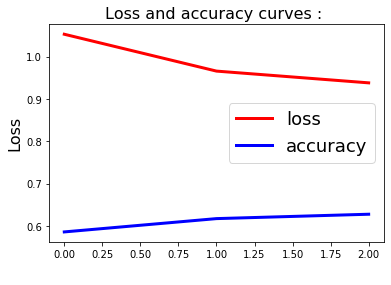

In [49]:
import matplotlib.pyplot as plt
fig1 = plt.figure()
plt.plot(history.history['loss'], 'r', linewidth=3.0)
plt.plot(history.history['acc'], 'b', linewidth=3.0)
plt.legend(['loss', 'accuracy'], fontsize=18)
plt.xlabel(' ', fontsize=16)
plt.ylabel('Loss', fontsize=16)
plt.title('Loss and accuracy curves : ', fontsize=16)
fig1.savefig('loss_lstm.png')